# **Machine Learning Foundation Course**

Name: Mary Kariuki

Abstract

The project examines the air quality index  from a dataset in Taiwan which is in CSV format,exploratory data analysis, visualization, data cleaning and  use of correlation  matrix to understand relationships between features and identify multicollinearity. i  have used randomforestregressorin training the model and r2_score in evaluating the performance of the model

# ***1. Access module***

In [23]:
#mounting the driive
from  google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Installation and  importing the required libraries

In [24]:
%%capture
%pip uninstall --yes fynesse
%pip install https://github.com/kariukimary/MLFC_Miniproject.git
%pip install osmnx


In [25]:
import os, subprocess, importlib, sys

def load_repo(repo):
    local = repo.split("/")[-1]
    if not os.path.exists(local):
        subprocess.run(["git", "clone", f"https://github.com/{repo}.git"], check=True)
    else:
        subprocess.run(["git", "-C", local, "pull"], check=True)
    if local not in sys.path:
        sys.path.insert(0, local)
    mod = importlib.import_module(local)
    importlib.reload(mod)
    return mod
fynesse = load_repo("kariukimary/MLFC_Miniproject")

In [26]:
# importing the libraries
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import fynesse
from fynesse import assess
from fynesse import address
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

# **Downloading the dataset**

The dataset   used in this project is called Taiwan Air Quality Index Data 2016~2024 which i have  obtained from kaggle for air quality prediction.
[here](https://www.kaggle.com/datasets/taweilo/taiwan-air-quality-data-20162024)
 with  the following collumns that add up to a total obeservation of 5 million and 25 columns.




In [5]:
data=fynesse.access.load_datasets("/content/drive/MyDrive/air_quality.csv")

Loading dataset from /content/drive/MyDrive/air_quality.csv ...
Dataset loaded: (5882208, 25)


In [6]:
data.head()

,date,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,...,windspeed,winddirec,unit,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
0,2024-08-31 23:00,Hukou,Hsinchu County,62.0,PM2.5,Moderate,0.9,0.17,35.0,40.2,...,2.3,225,NaN,0.2,20.1,26.0,1.0,121.038869,24.900097,22.0
1,2024-08-31 23:00,Zhongming,Taichung City,50.0,NaN,Good,1.6,0.32,27.9,35.1,...,1.1,184,NaN,0.2,15.3,23.0,1.0,120.641092,24.151958,31.0
2,2024-08-31 23:00,Zhudong,Hsinchu County,45.0,NaN,Good,0.4,0.17,25.1,40.6,...,0.4,210,NaN,0.2,13.8,24.0,0.0,121.088955,24.740914,23.0
3,2024-08-31 23:00,Hsinchu,Hsinchu City,42.0,NaN,Good,0.8,0.2,30.0,35.9,...,1.9,239,NaN,0.2,13.0,26.0,1.0,120.972368,24.805636,24.0
4,2024-08-31 23:00,Toufen,Miaoli County,50.0,NaN,Good,1.0,0.16,33.5,35.9,...,1.8,259,NaN,0.1,15.3,28.0,1.0,120.898693,24.696907,25.0


In [7]:
data.tail()

,date,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,...,windspeed,winddirec,unit,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
5882203,2016-11-25 13:00,Daliao,Kaohsiung City,77.0,PM2.5,Moderate,8.0,0.54,36,12.0,...,2.9,202.0,NaN,0.63,26.0,74.0,NaN,NaN,NaN,NaN
5882204,2016-11-25 13:00,Linyuan,Kaohsiung City,77.0,PM2.5,Moderate,4.6,0.31,94,41.0,...,2.5,224.0,NaN,0.46,26.0,39.0,NaN,NaN,NaN,NaN
5882205,2016-11-25 13:00,Nanzi,Kaohsiung City,74.0,PM2.5,Moderate,4.2,0.3,90,31.0,...,1.9,242.0,NaN,0.41,25.0,88.0,NaN,NaN,NaN,NaN
5882206,2016-11-25 13:00,Zuoying,Kaohsiung City,99.0,PM2.5,Moderate,6.7,0.62,115,40.0,...,2.8,280.0,NaN,0.63,35.0,65.0,NaN,NaN,NaN,NaN
5882207,2016-11-25 13:00,Qianjin,Kaohsiung City,84.0,PM2.5,Moderate,2.9,0.47,76,34.0,...,3.6,290.0,NaN,0.62,29.0,66.0,NaN,NaN,NaN,NaN


# **2. Assess module**

**Exploratory data analysis**

In this module, I performed various EDA tasks, including checking for duplicates and null values, getting statistical summaries analyzing, value counts for categorical variable.These steps helped me understand the the dataset



In [8]:
#getting the column names
cols=fynesse.assess.col_names(data)


Column names:
 ['date', 'sitename', 'county', 'aqi', 'pollutant', 'status', 'so2', 'co', 'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no', 'windspeed', 'winddirec', 'unit', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg', 'longitude', 'latitude', 'siteid']


In [9]:
#getting the values counts for status
count= fynesse.assess.value_counts(data,"status")



Value counts for status:
 status
Good                              3185191
Moderate                          2159158
Unhealthy for Sensitive Groups     343909
Unhealthy                           51008
Very Unhealthy                        173
Hazardous                              51
Name: count, dtype: int64


In [10]:
#gtting value_counts for county
count= fynesse.assess.value_counts(data,"county")


Value counts for county:
 county
New Taipei City      898819
Kaohsiung City       888497
Taipei City          503766
Taoyuan City         448718
Taichung City        367033
Tainan City          366827
Pingtung County      305495
Changhua County      293423
Yunlin County        287491
Miaoli County        219683
Nantou County        216420
Yilan County         147071
Chiayi County        143986
Hsinchu County       143846
Taitung County       143809
Hsinchu City          75850
Lienchiang County     71914
Keelung City          71913
Kinmen County         71913
Chiayi City           71912
Hualien County        71912
Penghu County         71910
Name: count, dtype: int64


In [11]:
# checking  for the duplicates
duplicates=fynesse.assess.check_duplicates(data)

Total duplicate rows: 0


In [12]:
#checking for null values
null=fynesse.assess.null_values(data)

Missing values per column:
 date               0
sitename           0
county             0
aqi            43020
pollutant    3235012
status        142718
so2           139768
co            113504
o3            125017
o3_8hr        131081
pm10          140358
pm2.5         131438
no2           165977
nox           169124
no            169455
windspeed     219498
winddirec     219736
unit         5882208
co_8hr         81229
pm2.5_avg      79941
pm10_avg       89875
so2_avg       629162
longitude     933620
latitude      933620
siteid       1779469
dtype: int64

Percentage missing:
 date           0.00
sitename       0.00
county         0.00
aqi            0.73
pollutant     55.00
status         2.43
so2            2.38
co             1.93
o3             2.13
o3_8hr         2.23
pm10           2.39
pm2.5          2.23
no2            2.82
nox            2.88
no             2.88
windspeed      3.73
winddirec      3.74
unit         100.00
co_8hr         1.38
pm2.5_avg      1.36
pm10_avg    

In [13]:
#getting the  descriptive statistical summary
summary=fynesse.assess.statistical_summary(data)



Statistical Summary:
                 aqi  unit     longitude      latitude        siteid
count  5.839188e+06   0.0  4.948588e+06  4.948588e+06  4.102739e+06
mean   5.419277e+01   NaN  1.208235e+02  2.404500e+01  5.608608e+01
std    2.985864e+01   NaN  9.644120e-01  1.002014e+00  6.233482e+01
min   -1.000000e+00   NaN  0.000000e+00  0.000000e+00  0.000000e+00
25%    3.200000e+01   NaN  1.203455e+02  2.304820e+01  2.100000e+01
50%    4.600000e+01   NaN  1.206853e+02  2.415196e+01  4.200000e+01
75%    7.000000e+01   NaN  1.214492e+02  2.501297e+01  6.500000e+01
max    5.000000e+02   NaN  1.218157e+02  2.625800e+01  3.140000e+02


# **Data visualization**



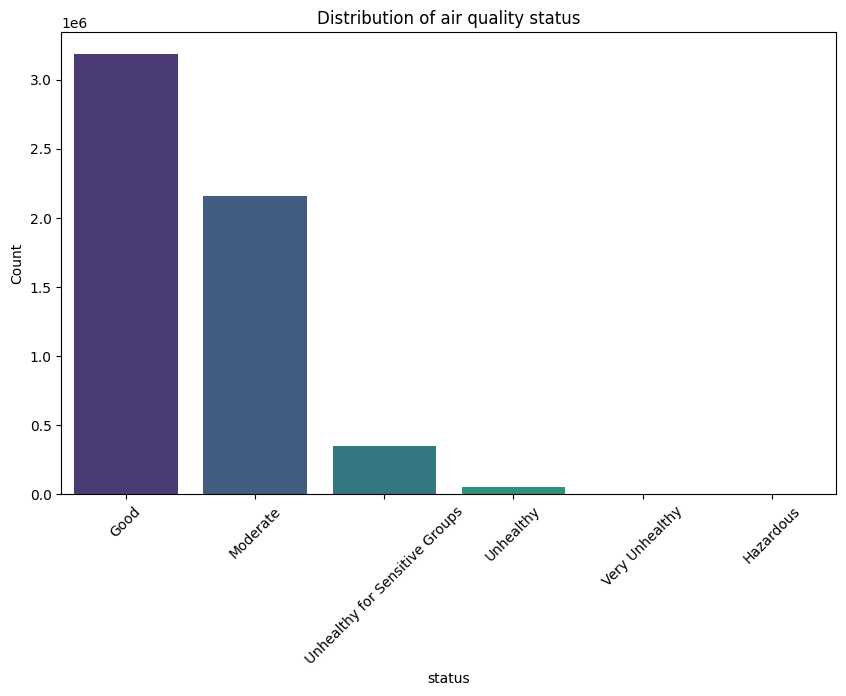

In [14]:
# Assuming you have a DataFrame df with a column 'status'
map=fynesse.assess.plot(data, 'status')


# **OpenStreetmap**

In [15]:
#  Filter the dataset
df = data[data['sitename'] == "Daliao"][[
    'latitude', 'longitude', 'aqi', 'county', 'status'
]].copy()
df = df.dropna()
print(df.head())
print("Number of rows after dropping nulls:", len(df))


      latitude   longitude   aqi          county    status
73   22.564136  120.425311  50.0  Kaohsiung City      Good
158  22.564136  120.425311  50.0  Kaohsiung City      Good
182  22.564136  120.425311  52.0  Kaohsiung City  Moderate
267  22.564136  120.425311  56.0  Kaohsiung City  Moderate
352  22.564136  120.425311  60.0  Kaohsiung City  Moderate
Number of rows after dropping nulls: 59980


In [35]:
# import folium
# # setting the initial map location (centered at your lat/lon)
# m = folium.Map(location=[22.564136, 120.425311], zoom_start=15)
# for idx, row in df.iterrows():
#     folium.CircleMarker(
#         location=[row['latitude'], row['longitude']],
#         radius=5,
#         color='green' if row['status'] == 'Good' else
#               'orange' if row['status'] == 'Moderate' else
#               'red',
#         fill=True,
#         fill_color='green' if row['status'] == 'Good' else
#                    'orange' if row['status'] == 'Moderate' else
#                    'red',
#         fill_opacity=0.7,
#         popup=f"AQI: {row['aqi']}\nStatus: {row['status']}\nCounty: {row['county']}"
#     ).add_to(m)


# m


# Data cleaning
the dataset had some null values which most of them were at a lower percentage except the unit column which i dropped completely, while the rest i dropped null values
I  also dropped unnecessary columns that were not required for training and encoded categorical variables for model readines.

The dataset had some columns as object,  and i convert them using the  convert_to_numeric function

In [17]:
# Converting object columns to numeric
conversion=fynesse.assess.convert_to_numeric(data)


*Handling Unnessesary columns and null values *

Most of the columns  had few null values  which i drop them, except the unit column which had null values the entire column and  i dropped the entire column

In [18]:
#dropping unneccesary columns in training
data=fynesse.assess.drop_unnecessary_columns(data)

In [19]:
#dropping the null values
data=fynesse.assess.drop_nulls(data)



In [20]:
null=fynesse.assess.null_values(data)

Missing values per column:
 aqi          0
status       0
so2          0
co           0
o3           0
o3_8hr       0
pm10         0
pm2.5        0
no2          0
nox          0
no           0
windspeed    0
winddirec    0
co_8hr       0
pm2.5_avg    0
pm10_avg     0
so2_avg      0
dtype: int64

Percentage missing:
 aqi          0.0
status       0.0
so2          0.0
co           0.0
o3           0.0
o3_8hr       0.0
pm10         0.0
pm2.5        0.0
no2          0.0
nox          0.0
no           0.0
windspeed    0.0
winddirec    0.0
co_8hr       0.0
pm2.5_avg    0.0
pm10_avg     0.0
so2_avg      0.0
dtype: float64


In [21]:
data=fynesse.assess.encode(data, col="status")
print(data["status"].unique())


[1 0 2 3 4 5]


# Correlation  matrix

I   computed the correlation matrix to understand relationships between features and identify multicollinearity

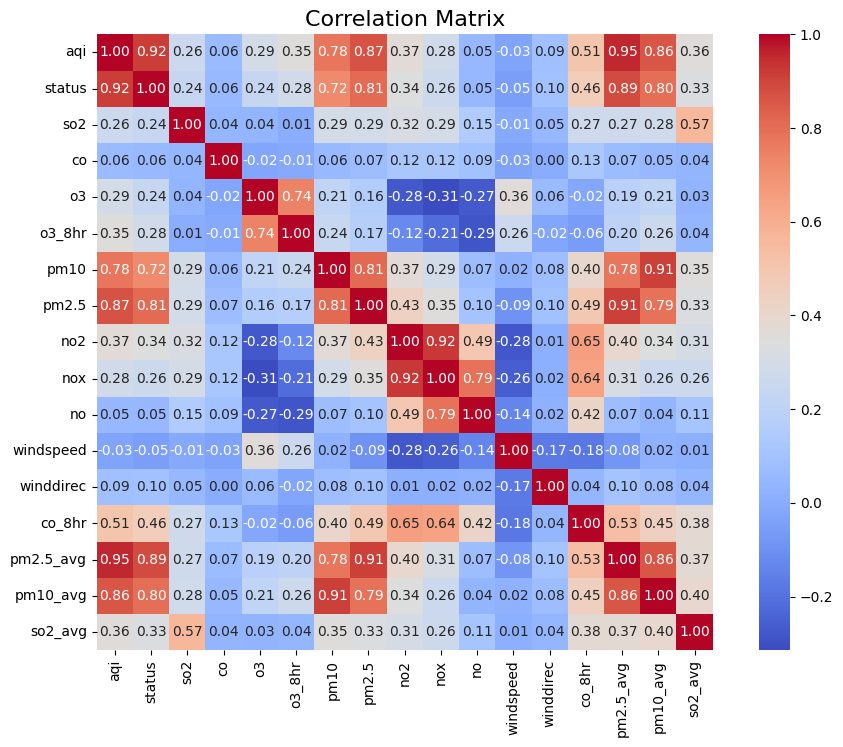

In [22]:
corr_matrix = fynesse.assess.correlation_matrix(data)


# **3.Address Module**

In this module it involved task such as spliting the dataset, standardizing the dataset, fitting the model and evaluatig the performance oof the model,

The dataset had 4million observation, and therefore i used a subset of the dataset to train the model

Model  building and training

In [27]:
#spliting the dataset
data = data.sample(frac=0.05, random_state=42)
X = data.drop("aqi", axis=1)
y = data["aqi"]
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [29]:
#stanndardizing the data
X_train_scaled, X_test_scaled, scaler =fynesse.address.scale_features(x_train, X_test)


In [30]:
data.shape

(230079, 17)

In [31]:
# fitting the model
model =fynesse.address.fit_regressor(x_train, y_train)


In [32]:
#evaluation of the model
y_pred = model.predict(X_test)

In [34]:
#using R2_score to evaluate the performance of the model
r2 = r2_score(y_test, y_pred)
r2


0.9988104738468204